# Decision Trees

### What are Decision Trees?
- Decision Trees are a type of supervised machine learning. You explain what the input is as well as the corresponding ouput in the training data where the information is consistently parted by a specific boundary. The tree can be made sense of by two substances, to be specific decision nodes and leaves. the leaves are the choices or the ultimate results. Furthermore, the decision nodes are where the data is split.

![alt text](https://miro.medium.com/max/1200/0*7xow30weh2lVxhsp.png)

### Pros and Cons
Pros
-  Decision trees can be used to predict both continuous and discrete values i.e. they work well in both regression and classification tasks.

- An advantage of the decision tree algorithm is that it does not require any transformation of the features if we are dealing with non-linear data because decision trees do not take multiple weighted combinations into account simultaneously.

- The data type of decision tree can handle any type of data whether it is numerical or categorical, or boolean.

- Decision trees are very fast and efficient

- In the decision tree, there is no effect by the outsider or missing data in the node of the tree, that’s why the decision tree requires fewer data.

Cons
- Take more time for training-time complexity to increase as the input increases.

- With decision trees you can potentially overfit your models.

- If the size of data is too big, then one single tree may grow a lot of nodes which might result in complexity and leads to overfitting.



In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Now that we have our libraries loaded in, lets take a look at our diabetes data and find some variables that we want to work with.

In [2]:
df = pd.read_csv("/Users/chan/Desktop/Data Science 4/Github Repository/Datasets/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


I wanted our data to be non linear so that we could see the capabilities of decision trees.

In [9]:
data = df[["Glucose", "Pregnancies", "Outcome"]]
data


,BloodPressure,Age,Outcome
0,72,50,1
1,66,31,0
2,64,32,1
3,66,21,0
4,40,33,1
...,...,...,...
763,76,63,0
764,70,27,0
765,72,30,0
766,60,47,1


In [103]:
X = df[["Glucose", "Pregnancies"]].values
y = df.Outcome.values


Now lets visualize our data.

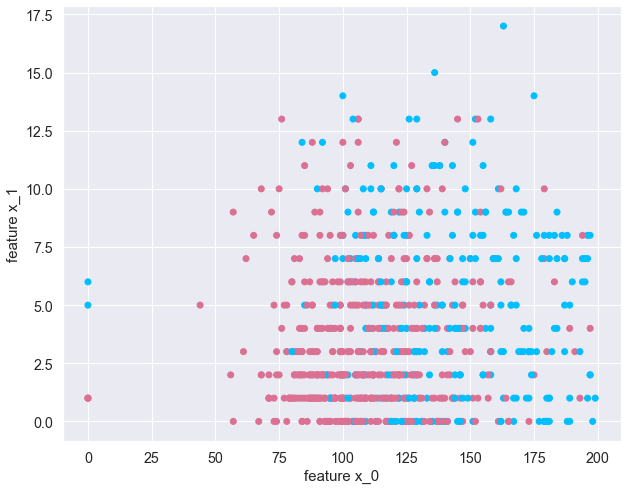

In [104]:

colors = ["palevioletred" if Outcome == 0 else "deepskyblue" for Outcome in y]
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c = colors)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid(True)
plt.show()

From sklearn we will be importing train_test_split to train our data on our X and y values.

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

c_train = ["palevioletred" if Outcome == 0 else "deepskyblue" for Outcome in y_train]
c_test = ["palevioletred" if Outcome == 0 else "deepskyblue" for Outcome in y_test]

In [106]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

|--- x_0 <= 154.50
|   |--- x_0 <= 99.50
|   |   |--- x_0 <= 22.00
|   |   |   |--- x_1 <= 3.00
|   |   |   |   |--- class: 0
|   |   |   |--- x_1 >  3.00
|   |   |   |   |--- class: 1
|   |   |--- x_0 >  22.00
|   |   |   |--- x_1 <= 11.00
|   |   |   |   |--- x_0 <= 87.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- x_0 >  87.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- x_1 >  11.00
|   |   |   |   |--- x_0 <= 86.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- x_0 >  86.00
|   |   |   |   |   |--- class: 0
|   |--- x_0 >  99.50
|   |   |--- x_1 <= 5.50
|   |   |   |--- x_0 <= 111.50
|   |   |   |   |--- x_0 <= 101.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- x_0 >  101.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- x_0 >  111.50
|   |   |   |   |--- x_0 <= 127.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- x_0 >  127.50
|   |   |   |   |   |--- class: 0
|   |   |--- x_1 >  5.50
|   |   |   |--- x_0 <= 152.00
|   |   |   |   

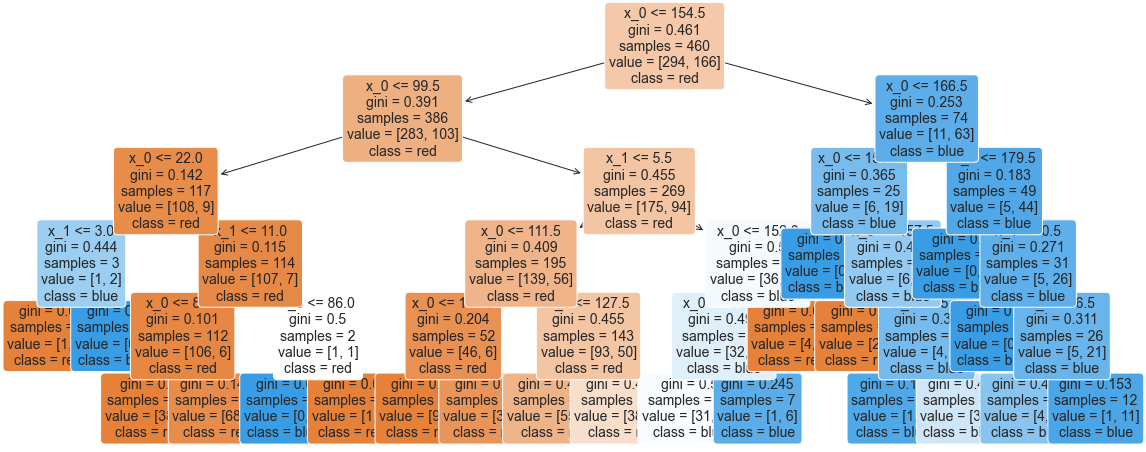

In [107]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

tree_rules = export_text(decision_tree,
                         feature_names = ["x_0", "x_1"])
print(tree_rules, "\n")


plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
                   feature_names = ["x_0", "x_1"],
                   class_names = ["red", "blue"],
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

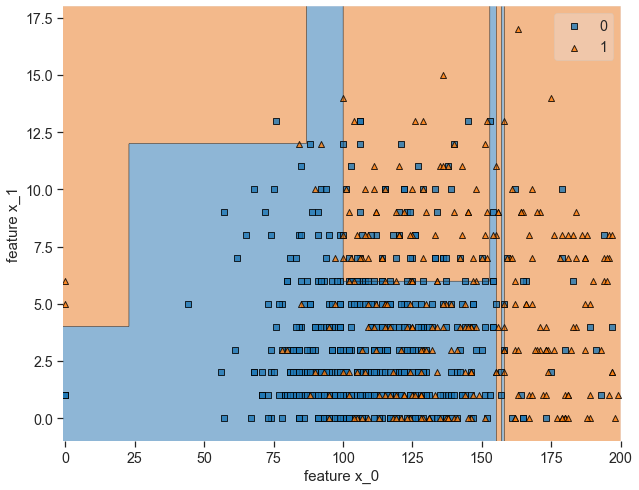

In [108]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = decision_tree)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

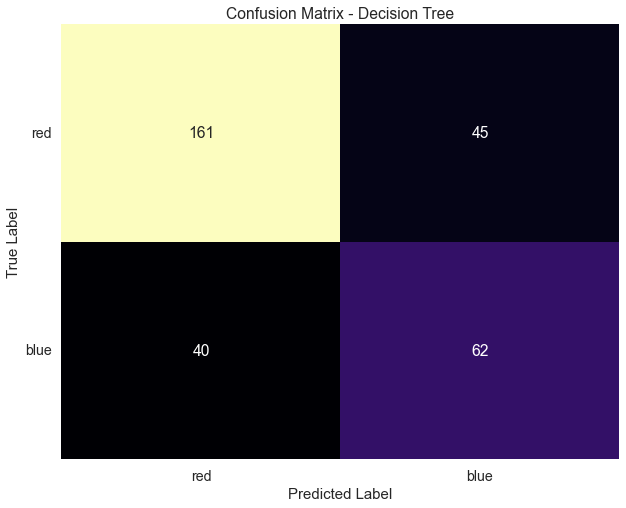

In [109]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn 
from sklearn import metrics

# Note: visualizing your tree above will be weird after running seaborn
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["red", "blue"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["red", "blue"], rotation=0)
plt.show()

In [110]:
from sklearn.metrics import classification_report

y_pred = decision_tree.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       206
           1       0.58      0.61      0.59       102

    accuracy                           0.72       308
   macro avg       0.69      0.69      0.69       308
weighted avg       0.73      0.72      0.73       308



One thing that I would like to shed some light on with Decision trees is that it is very powerful. Even though our test percentage might not show it since it is at a 73% success rate for this particular dataset, if you were to use a different dataset with more spread in its data or less overlap you would see a tremendous improvement in your success rate because of the way decision trees can change directions with the number of max_depth.